In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('OSM_training_data/ensemble_dataset.csv')

In [3]:
dataset.head()

cat_dict = {0:'ADULT', 1:'COUNTERFEIT', 2:'LEGIT', 3:'PHARMA', 4:'SMOKE', 5:'TMS', 6:'WEAPON'}
dataset['category_number'] = dataset['category_number'].map(cat_dict)

In [4]:
features = ['name', 'bodytxt', 'tagtxt', 'price', 'category_number', 'combinedtxt_noNumSWPunc_morethan2char']
df = dataset[features]

In [5]:
df.head()

name  \
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...   
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...   
2     Vitamins Biotics Research - Detoxification 4oz   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   
4  Herbal Supplements Natural Natural Blood Press...   

                                             bodytxt tagtxt   price  \
0  BLOODSHR3D (WAR EDITION) Ultra Premium Fat Bur...    NaN  282.84   
1  Hyland's Cell Salts #12 Silicea 30X Tablets, N...    NaN  145.88   
2  Biotics Research - Detoxification 4oz Product ...    NaN  248.77   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...    NaN  492.20   
4  Natural Blood Pressure Supplement: Blood Press...    NaN  233.52   

  category_number              combinedtxt_noNumSWPunc_morethan2char  
0           LEGIT  Fat Burners Thermogenics BLOODSHRD WAR EDITION...  
1           LEGIT  Vitamins Hylands Cell Salts Silicea Tablets Na...  
2           LEGIT  Vitamins Biotics Research Detoxification Bioti...  
3           LEGIT  HEWLETT PACKARD Toner Page Yield Black Clear S...  
4           LEGIT  Herbal Supplements Natural Natural Blood Press...

In [6]:
df.isnull().sum(axis = 0)

name                                        0
bodytxt                                   109
tagtxt                                   3052
price                                     259
category_number                             0
combinedtxt_noNumSWPunc_morethan2char       0
dtype: int64

In [7]:
my_tab = pd.crosstab(index = df['category_number'],  # Make a crosstab
                              columns="count")      # Name the count column

In [8]:
my_tab.plot.bar(figsize = (16, 10), fontsize = 20, rot = 45)


In [9]:
my_tab

col_0            count
category_number       
ADULT              631
COUNTERFEIT       1478
LEGIT            50933
PHARMA            8561
SMOKE              234
TMS                114
WEAPON             867

81% of the dataset is LEGIT as shown. 

In [10]:
(my_tab/my_tab.sum()) * 100

col_0                count
category_number           
ADULT             1.004489
COUNTERFEIT       2.352829
LEGIT            81.080264
PHARMA           13.628259
SMOKE             0.372505
TMS               0.181477
WEAPON            1.380178

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

Using TensorFlow backend.


In [12]:
import nltk

In [13]:
# nltk.download()

In [14]:
df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '').str.split()[0]

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'by',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

In [15]:
df['name'][0]

'Fat Burners & Thermogenics BLOODSHR3D (WAR EDITION) Ultra Premium Fat Burning & Thermogenic Fuel by Olympus Labs (GRAPE BUBBLEGUM)'

In [16]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [17]:
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '').str.split()[0]

porter = PorterStemmer()
lancaster=LancasterStemmer()


## Stemming 

The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. One table containing about 120 rules indexed by the last letter of a suffix. On each iteration, it tries to find an applicable rule by the last character of the word. LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

PorterStemmer is known for its simplicity and speed. It is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries

In [18]:
for word in test:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Fat                 fat                 fat                 
Burners             burner              burn                
Thermogenics        thermogen           thermog             
BLOODSHRD           bloodshrd           bloodshrd           
WAR                 war                 war                 
EDITION             edit                edit                
Ultra               ultra               ultr                
Premium             premium             prem                
Fat                 fat                 fat                 
Burning             burn                burn                
Thermogenic         thermogen           thermog             
Fuel                fuel                fuel                
by                  by                  by                  
Olympus             olympu              olymp               
Labs                lab                 lab                 
GRAPE               grape               grap                
BUBBLEGUM           bubb

## Stop words

Stop Words are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [19]:
from nltk.stem.snowball import SnowballStemmer

englishStemmer2=SnowballStemmer("english", ignore_stopwords=True)


In [20]:
# nltk.download('stopwords')

In [21]:
englishStemmer2.stem('having')

'having'

## Stopwords Removal

In [22]:
# nltk.download('wordnet')
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')

test[0]

'Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUM'

In [23]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize

tokens = word_tokenize(test[0])
result = [i for i in tokens if not i in stop_words]

result

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

## Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form. The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”. 

For example, was --> be 


In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

for word in test + ['was', ]:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos = 'v')))

Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUMwasFat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUMwas
Vitamins Hylands Cell Salts  Silicea X Tablets Natural Homeopathic Acne Pimples Blackheads and Hair and Nails Relief  CountwasVitamins Hylands Cell Salts  Silicea X Tablets Natural Homeopathic Acne Pimples Blackheads and Hair and Nails Relief  Countwas
Vitamins Biotics Research  Detoxification ozwasVitamins Biotics Research  Detoxification ozwas
HEWLETTPACKARD CA Toner  PageYield Black Clear Sharp Printouts For HighImpact Results by HPwasHEWLETTPACKARD CA Toner  PageYield Black Clear Sharp Printouts For HighImpact Results by HPwas
Herbal Supplements Natural Natural Blood Pressure Supplement Blood Pressure Support with Hawthorn Berry and Uva Ursi Herbs and Vitamins for High Blood Pressure  Capsules  Money Back GuaranteewasHerbal Supplemen

Vitamins  Dietary Supplements Weight Loss New Pure Garcinia Cambogia  Forskolin Extract Blend   Formula for Weight Loss  Appetite Suppression  Highest Grade  Best Premium Quality HCA  Guaranted By California ProductswasVitamins  Dietary Supplements Weight Loss New Pure Garcinia Cambogia  Forskolin Extract Blend   Formula for Weight Loss  Appetite Suppression  Highest Grade  Best Premium Quality HCA  Guaranted By California Productswas
Vitamins  Dietary Supplements Weight Loss ETB NaturaLean Thermogenic Fat Burner  Weight Loss Supplement   capsuleswasVitamins  Dietary Supplements Weight Loss ETB NaturaLean Thermogenic Fat Burner  Weight Loss Supplement   capsuleswas
Vitamins  Dietary Supplements Weight Loss Puritans Pride Garcinia Cambogia  mg plus Coconut Oil mg SoftgelswasVitamins  Dietary Supplements Weight Loss Puritans Pride Garcinia Cambogia  mg plus Coconut Oil mg Softgelswas
Vitamins  Dietary Supplements Weight Loss Green Coffee Beans Extract Weight Loss Supplement Green  Lean B

Pack of Private Parts and Under Arm Skin Lightening Bleaching Lotion Gel CreamwasPack of Private Parts and Under Arm Skin Lightening Bleaching Lotion Gel Creamwas
USA VIAGRA Pfizer Labs mg  TabletswasUSA VIAGRA Pfizer Labs mg  Tabletswas
NeoStrata Targeted Treatment HQ Skin Lightening Gel  OuncewasNeoStrata Targeted Treatment HQ Skin Lightening Gel  Ouncewas
BLACK and WHITE BLEACH CREAM ozwasBLACK and WHITE BLEACH CREAM ozwas
Azelaic Acid  Acne Rosacea Age Spots Freckles removal Night cream Skin whitening Gel anti bacterial reduce pigmentation wasAzelaic Acid  Acne Rosacea Age Spots Freckles removal Night cream Skin whitening Gel anti bacterial reduce pigmentation was
Quality Encapsulations Quality Encapsulations Garcinia Cambogia   Pure Garcinia Cambogia Extract with HCA Extra Strength  Capsules AlwasQuality Encapsulations Quality Encapsulations Garcinia Cambogia   Pure Garcinia Cambogia Extract with HCA Extra Strength  Capsules Alwas
Vitamin C Vitamin C AntiAging Brightening  Smoothi

Burn  Control Weight loss Gourmet Instant Coffee by Javita  Pack Burn  ControlwasBurn  Control Weight loss Gourmet Instant Coffee by Javita  Pack Burn  Controlwas
  Garcinia Cambogia Weight Loss Plus Appetite Suppression Eliminate Fat Storage Burn Fat Reduce Waistline Inches mg Extract  HCA  Garcinia Trim mg cwas  Garcinia Cambogia Weight Loss Plus Appetite Suppression Eliminate Fat Storage Burn Fat Reduce Waistline Inches mg Extract  HCA  Garcinia Trim mg cwas
Caralluma Fimbriata Fat Burning Formula  Plus Garcenia Cambogia  Raspberry Ketones  Green Coffee Tea Extract  Moringa  African Mango  Forskolin  Kidney Bean  Carb Blocker Appetite SuppressantwasCaralluma Fimbriata Fat Burning Formula  Plus Garcenia Cambogia  Raspberry Ketones  Green Coffee Tea Extract  Moringa  African Mango  Forskolin  Kidney Bean  Carb Blocker Appetite Suppressantwas
Purely Inspired Garcinia Gummies and Tablet Combo   ct Tabs   ct GummieswasPurely Inspired Garcinia Gummies and Tablet Combo   ct Tabs   ct Gummi

Adam Anal Sex Toy For Men gspot vibrator ushape butt plug prostate testicles vibrationwasAdam Anal Sex Toy For Men gspot vibrator ushape butt plug prostate testicles vibrationwas
Durex Fetherlite Condoms pc  Intimate MassagerwasDurex Fetherlite Condoms pc  Intimate Massagerwas
Pretty Love Recharge  Speed Wireless Remote Control Silicone Vibrator Vibe Adult Sex Toys Products For CouplesErotic Toys wasPretty Love Recharge  Speed Wireless Remote Control Silicone Vibrator Vibe Adult Sex Toys Products For CouplesErotic Toys was
 speed dildo vibrator sex toys magic wand clitoral stimulator AV stick vibrators for women Body massager sex products was speed dildo vibrator sex toys magic wand clitoral stimulator AV stick vibrators for women Body massager sex products was
AUSEXY LETEN Smart Vibrator App Remote Control USB Chargeable U Spot Vagina Massager Vibrator Adult Sex Toys Products for Women wasAUSEXY LETEN Smart Vibrator App Remote Control USB Chargeable U Spot Vagina Massager Vibrator Adu

New tactical folding knife D blade G handle DOC pocket camping hunting survival gift utility knives EDC hand tools wasNew tactical folding knife D blade G handle DOC pocket camping hunting survival gift utility knives EDC hand tools was
Hot Selling Hunting Camping Folding Knife D Blade G Handle Outdoor Pocket Survival Knife EDC tool wasHot Selling Hunting Camping Folding Knife D Blade G Handle Outdoor Pocket Survival Knife EDC tool was
high quality Folding Knives D Blade G Handle Flipper Tactical Knife Outdoor Camping Survival Sharp knife EDC Tool LCM washigh quality Folding Knives D Blade G Handle Flipper Tactical Knife Outdoor Camping Survival Sharp knife EDC Tool LCM was
Characteristic Damascus Wootz Steel Fixed Blade Hunting Knife Tactical Survival knives Camping Knife Wood Handle  g  wasCharacteristic Damascus Wootz Steel Fixed Blade Hunting Knife Tactical Survival knives Camping Knife Wood Handle  g  was
Green thorn  Anax bearing tactical folding knife D blade aluminum handle cam

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




RUSK Paste  fl ozwasRUSK Paste  fl ozwas
Strong Hold Hair Wax LuckyFine Hair Styling Clay Hair Styling Cream for Man Unisex Hair Wax for Textured Thickened Hair Mud Cream for Gift ozwasStrong Hold Hair Wax LuckyFine Hair Styling Clay Hair Styling Cream for Man Unisex Hair Wax for Textured Thickened Hair Mud Cream for Gift ozwas
VINCENT LONGO Everbrow Micro Pencil and Sharpener BlackwasVINCENT LONGO Everbrow Micro Pencil and Sharpener Blackwas
Jolie Eye Brow Definer Browblender Pencil Liner Soft TaupewasJolie Eye Brow Definer Browblender Pencil Liner Soft Taupewas
LA Girl Shady Slim Brow Pencil  AuburnwasLA Girl Shady Slim Brow Pencil  Auburnwas
Eyebrow Pencil Smooth Soft Black Brow PencilwasEyebrow Pencil Smooth Soft Black Brow Pencilwas
Hard Case Storage Bag for Waterpik Cordless Advanced Water FlosserWP by AprocawasHard Case Storage Bag for Waterpik Cordless Advanced Water FlosserWP by Aprocawas
Eylure DefiningShading Eye Brow Crayon Mid BrownwasEylure DefiningShading Eye Brow Crayo

Emani AllInOne Vegan Eyebrow Cream  oz Dark BrownwasEmani AllInOne Vegan Eyebrow Cream  oz Dark Brownwas
Eyebrow Tattoo Microblading Blade Pen DoubleEnded With U Pin Blade Needles Multifunctional Manual Makeup Tool Silver PenWhite NeedlewasEyebrow Tattoo Microblading Blade Pen DoubleEnded With U Pin Blade Needles Multifunctional Manual Makeup Tool Silver PenWhite Needlewas
Marcelle Duo EyebrowProwasMarcelle Duo EyebrowProwas
Billion Dollar Brows Piece Love Your Brows Kit with Tweezers Universal Brow Pencil and Brow Gel for Easy Maintenance and All Day Eyebrow ColorwasBillion Dollar Brows Piece Love Your Brows Kit with Tweezers Universal Brow Pencil and Brow Gel for Easy Maintenance and All Day Eyebrow Colorwas
Benefit Precisely My Brow Pencil Ultra Fine Brow Defining Pencil    Light gozwasBenefit Precisely My Brow Pencil Ultra Fine Brow Defining Pencil    Light gozwas
Jordana Fabubrow Shape  Set Gel  BlondewasJordana Fabubrow Shape  Set Gel  Blondewas
Etude House Drawing Eye Brow   Gra

Remax Proda Star Talk mAh PPP Power Bank White  Year Local Supplier WarrantywasRemax Proda Star Talk mAh PPP Power Bank White  Year Local Supplier Warrantywas
GGSELL GGSELL pcs different temporary tattoos designs in one package it including fishheartkeycute catlips and totem tattoo stickerswasGGSELL GGSELL pcs different temporary tattoos designs in one package it including fishheartkeycute catlips and totem tattoo stickerswas
Remax RPL mAh Shell Portable Power Bank with Unique Mini Design Green  Year Local Supplier WarrantywasRemax RPL mAh Shell Portable Power Bank with Unique Mini Design Green  Year Local Supplier Warrantywas
IDEEB Gel Eye Shadow No  Ever Bronze  CountwasIDEEB Gel Eye Shadow No  Ever Bronze  Countwas
India Crafts  Packs   Colorful Crystal Bindi Velvette round face jewels TikawasIndia Crafts  Packs   Colorful Crystal Bindi Velvette round face jewels Tikawas
sheet Naughty Girl Temporary Tattoos Set Set Bwassheet Naughty Girl Temporary Tattoos Set Set Bwas
Pur Minerals P

Ancient Secrets Mineral Baths Aromatherapy Dead Sea Unscented  oz  Lbs  G Pack of wasAncient Secrets Mineral Baths Aromatherapy Dead Sea Unscented  oz  Lbs  G Pack of was
JMTM Evershadow Spun SugarwasJMTM Evershadow Spun Sugarwas
In His Shadowwas    In His Shadowwas    
Pink Ribbon Bow Temporary Tattoo Set of wasPink Ribbon Bow Temporary Tattoo Set of was
Tattly Temporary Tattoos Flora  fauna set  OuncewasTattly Temporary Tattoos Flora  fauna set  Ouncewas
Premium Temporary Tattoos  Sheets  Metallic Gold Silver Turquoise Flash Tattoos for Women  Girls  Over  Tattoos   Sheet for Bonus Nail StickerwasPremium Temporary Tattoos  Sheets  Metallic Gold Silver Turquoise Flash Tattoos for Women  Girls  Over  Tattoos   Sheet for Bonus Nail Stickerwas
JMTM Evershadow Spun SugarwasJMTM Evershadow Spun Sugarwas
Lotil Cream mloz  PackwasLotil Cream mloz  Packwas
Evarne Coconut Monoi Dead Sea Salt Body Scrub with  Essential Oils and Vitamin EwasEvarne Coconut Monoi Dead Sea Salt Body Scrub with  Ess

Jolie Matte Eye Shadow  Hypoallergenic  OatmealwasJolie Matte Eye Shadow  Hypoallergenic  Oatmealwas
cm Silver  Barrettes AccessoriesElevinTM Women Girls Leaf Hair Pins Clip Hair Claw Barrettes Accessories Ponytail Holder cm Silverwascm Silver  Barrettes AccessoriesElevinTM Women Girls Leaf Hair Pins Clip Hair Claw Barrettes Accessories Ponytail Holder cm Silverwas
Jolie Matte Eye Shadow  Hypoallergenic  TornadowasJolie Matte Eye Shadow  Hypoallergenic  Tornadowas
Sephora Colorful Eyeshadow Rio wasSephora Colorful Eyeshadow Rio was
NFL Green Bay Packers Fingernail Tattoos BlackwasNFL Green Bay Packers Fingernail Tattoos Blackwas
Sephora Colorful Eyeshadow Rio wasSephora Colorful Eyeshadow Rio was
Ben Nye Foundation  Contour Brushes FoundationwasBen Nye Foundation  Contour Brushes Foundationwas
elf Flawless Eyeshadow Blushing Beauty  Ouncewaself Flawless Eyeshadow Blushing Beauty  Ouncewas
Johnny B GO Texture Cream  ozwasJohnny B GO Texture Cream  ozwas
Kryolan  Dermacolor Camouflage Mi

Lor MU Classic Tan Size zwasLor MU Classic Tan Size zwas
Faship Gorgeous Peacock Feather Hair Comb Emerald Green AB CrystalwasFaship Gorgeous Peacock Feather Hair Comb Emerald Green AB Crystalwas
I on Beauty Ferrule Foundation Brush Colored HandlewasI on Beauty Ferrule Foundation Brush Colored Handlewas
GoComb  Wallet Comb  Sleek Durable Stainless Steel Hair  Beard Comb  BlackwasGoComb  Wallet Comb  Sleek Durable Stainless Steel Hair  Beard Comb  Blackwas
Illuminare Fantastic Finish Foundation Portofino PorcelainwasIlluminare Fantastic Finish Foundation Portofino Porcelainwas
Aukmla Wedding Hair Combs with Rhinestones for Women and GirlswasAukmla Wedding Hair Combs with Rhinestones for Women and Girlswas
IMAN Second To None Cream To Powder Foundation Medium Skin Clay wasIMAN Second To None Cream To Powder Foundation Medium Skin Clay was
IMAN Cosmetics Concealing Foundation Dark Skin Earth wasIMAN Cosmetics Concealing Foundation Dark Skin Earth was
Silentrees No Static Buffalo Horn Comb

Jean Pierre Desiree Crystalline NylonwasJean Pierre Desiree Crystalline Nylonwas
Upgrade BIBTIM Round Hair Brush Twill with Boar Bristle for Blow Drying Curling  Straightening Professional Salon Styling Brush Nano Technology Ceramic for Perfect Volume  Shine Gold  inchwasUpgrade BIBTIM Round Hair Brush Twill with Boar Bristle for Blow Drying Curling  Straightening Professional Salon Styling Brush Nano Technology Ceramic for Perfect Volume  Shine Gold  inchwas
Shiseido Spotscover Foundation goz H BrighterwasShiseido Spotscover Foundation goz H Brighterwas
MIZON Snail Repair Intensive AmpoulewasMIZON Snail Repair Intensive Ampoulewas
SARDINE SDY ULTRA SLIM WIRELESS BLUETOOTH SPEAKER DUAL LOUDSPEAKER HIFI STEREO SOUND WITH MIC MM JACK USB TF CARD SLOT SUPPORT ALARM CLOCK HANDSFREE CALLS FM RADIOwasSARDINE SDY ULTRA SLIM WIRELESS BLUETOOTH SPEAKER DUAL LOUDSPEAKER HIFI STEREO SOUND WITH MIC MM JACK USB TF CARD SLOT SUPPORT ALARM CLOCK HANDSFREE CALLS FM RADIOwas
MISSHA M PERFECT COVER BB C

Benefit Cosmetics Stay Dont Stray Stayput Primer for Concealers  Eye Shadows LightmediumwasBenefit Cosmetics Stay Dont Stray Stayput Primer for Concealers  Eye Shadows Lightmediumwas
Lychee Salon Portable  in  Curler  Straightener Hot Hair Iron Curling Ceramic Wave PinkwasLychee Salon Portable  in  Curler  Straightener Hot Hair Iron Curling Ceramic Wave Pinkwas
Matell Monster High Hair Brush Set of wasMatell Monster High Hair Brush Set of was
Bed Head Waveaholic for Tight Waves Volume  Crimp Like Texture  InchwasBed Head Waveaholic for Tight Waves Volume  Crimp Like Texture  Inchwas
J Hair Tool  inch Chrome Curling Iron Model DREwasJ Hair Tool  inch Chrome Curling Iron Model DREwas
Pro Milano Belleza Straight Ceramic Hair Straightening Brush Belize Blue  PoundwasPro Milano Belleza Straight Ceramic Hair Straightening Brush Belize Blue  Poundwas
Hot Tools Turbo Ceramic Ionic Salon DryerwasHot Tools Turbo Ceramic Ionic Salon Dryerwas
Diane Boar Bristle Wave BrushwasDiane Boar Bristle Wave

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Stemming or lemmatization?

After going through the entire tutorial, you may be asking yourself when should I use Stemming and when should I use Lemmatization? The answer itself is in whatever you have learned from this tutorial. You have seen the following points:

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

So when to use what! The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms

In [25]:
test = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')[0]

test

'Fat Burners  Thermogenics BLOODSHRD WAR EDITION Ultra Premium Fat Burning  Thermogenic Fuel by Olympus Labs GRAPE BUBBLEGUM'

In [26]:
t = Tokenizer()
t.fit_on_texts(test.split())

In [27]:
t.word_index

{'bloodshrd': 4,
 'bubblegum': 16,
 'burners': 2,
 'burning': 9,
 'by': 12,
 'edition': 6,
 'fat': 1,
 'fuel': 11,
 'grape': 15,
 'labs': 14,
 'olympus': 13,
 'premium': 8,
 'thermogenic': 10,
 'thermogenics': 3,
 'ultra': 7,
 'war': 5}

## Text Pre-Processing

1. Remove punctuations
2. Remove stopwords 
3. Apply LancasterStemmer
4. Tokenize 

In [28]:
data = df['name'].apply(''.join).str.replace('[^A-Za-z\s]+', '')

In [29]:
data.head()

0    Fat Burners  Thermogenics BLOODSHRD WAR EDITIO...
1    Vitamins Hylands Cell Salts  Silicea X Tablets...
2         Vitamins Biotics Research  Detoxification oz
3    HEWLETTPACKARD CA Toner  PageYield Black Clear...
4    Herbal Supplements Natural Natural Blood Press...
Name: name, dtype: object

In [30]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize


for i in range(len(data)):
    
    tokens = word_tokenize(data[i])
    result = [i for i in tokens if not i in stop_words]
    
    data[i] = result


In [31]:
dataset['name'][0]

'Fat Burners & Thermogenics BLOODSHR3D (WAR EDITION) Ultra Premium Fat Burning & Thermogenic Fuel by Olympus Labs (GRAPE BUBBLEGUM)'

In [32]:
data[0]

['Fat',
 'Burners',
 'Thermogenics',
 'BLOODSHRD',
 'WAR',
 'EDITION',
 'Ultra',
 'Premium',
 'Fat',
 'Burning',
 'Thermogenic',
 'Fuel',
 'Olympus',
 'Labs',
 'GRAPE',
 'BUBBLEGUM']

In [33]:
data.head()

0    [Fat, Burners, Thermogenics, BLOODSHRD, WAR, E...
1    [Vitamins, Hylands, Cell, Salts, Silicea, X, T...
2    [Vitamins, Biotics, Research, Detoxification, oz]
3    [HEWLETTPACKARD, CA, Toner, PageYield, Black, ...
4    [Herbal, Supplements, Natural, Natural, Blood,...
Name: name, dtype: object

In [34]:
for i in range(len(data)):
    for j, word in enumerate(data[i]):
        # print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))
        data[i][j] = lancaster.stem(word)

In [35]:
data.head()

0    [fat, burn, thermog, bloodshrd, war, edit, ult...
1    [vitamin, hyland, cel, salt, silice, x, tablet...
2                 [vitamin, biot, research, detox, oz]
3    [hewlettpackard, ca, ton, pageyield, black, cl...
4    [herb, suppl, nat, nat, blood, press, suppl, b...
Name: name, dtype: object

In [36]:
all_row = []

m = len(data)

for i in range(m):
    print("{}/{}".format(i, m))
    all_row += data[i]

0/62818
1/62818
2/62818
3/62818
4/62818
5/62818
6/62818
7/62818
8/62818
9/62818
10/62818
11/62818
12/62818
13/62818
14/62818
15/62818
16/62818
17/62818
18/62818
19/62818
20/62818
21/62818
22/62818
23/62818
24/62818
25/62818
26/62818
27/62818
28/62818
29/62818
30/62818
31/62818
32/62818
33/62818
34/62818
35/62818
36/62818
37/62818
38/62818
39/62818
40/62818
41/62818
42/62818
43/62818
44/62818
45/62818
46/62818
47/62818
48/62818
49/62818
50/62818
51/62818
52/62818
53/62818
54/62818
55/62818
56/62818
57/62818
58/62818
59/62818
60/62818
61/62818
62/62818
63/62818
64/62818
65/62818
66/62818
67/62818
68/62818
69/62818
70/62818
71/62818
72/62818
73/62818
74/62818
75/62818
76/62818
77/62818
78/62818
79/62818
80/62818
81/62818
82/62818
83/62818
84/62818
85/62818
86/62818
87/62818
88/62818
89/62818
90/62818
91/62818
92/62818
93/62818
94/62818
95/62818
96/62818
97/62818
98/62818
99/62818
100/62818
101/62818
102/62818
103/62818
104/62818
105/62818
106/62818
107/62818
108/62818
109/62818
110/62818


1907/62818
1908/62818
1909/62818
1910/62818
1911/62818
1912/62818
1913/62818
1914/62818
1915/62818
1916/62818
1917/62818
1918/62818
1919/62818
1920/62818
1921/62818
1922/62818
1923/62818
1924/62818
1925/62818
1926/62818
1927/62818
1928/62818
1929/62818
1930/62818
1931/62818
1932/62818
1933/62818
1934/62818
1935/62818
1936/62818
1937/62818
1938/62818
1939/62818
1940/62818
1941/62818
1942/62818
1943/62818
1944/62818
1945/62818
1946/62818
1947/62818
1948/62818
1949/62818
1950/62818
1951/62818
1952/62818
1953/62818
1954/62818
1955/62818
1956/62818
1957/62818
1958/62818
1959/62818
1960/62818
1961/62818
1962/62818
1963/62818
1964/62818
1965/62818
1966/62818
1967/62818
1968/62818
1969/62818
1970/62818
1971/62818
1972/62818
1973/62818
1974/62818
1975/62818
1976/62818
1977/62818
1978/62818
1979/62818
1980/62818
1981/62818
1982/62818
1983/62818
1984/62818
1985/62818
1986/62818
1987/62818
1988/62818
1989/62818
1990/62818
1991/62818
1992/62818
1993/62818
1994/62818
1995/62818
1996/62818
1997/62818

3825/62818
3826/62818
3827/62818
3828/62818
3829/62818
3830/62818
3831/62818
3832/62818
3833/62818
3834/62818
3835/62818
3836/62818
3837/62818
3838/62818
3839/62818
3840/62818
3841/62818
3842/62818
3843/62818
3844/62818
3845/62818
3846/62818
3847/62818
3848/62818
3849/62818
3850/62818
3851/62818
3852/62818
3853/62818
3854/62818
3855/62818
3856/62818
3857/62818
3858/62818
3859/62818
3860/62818
3861/62818
3862/62818
3863/62818
3864/62818
3865/62818
3866/62818
3867/62818
3868/62818
3869/62818
3870/62818
3871/62818
3872/62818
3873/62818
3874/62818
3875/62818
3876/62818
3877/62818
3878/62818
3879/62818
3880/62818
3881/62818
3882/62818
3883/62818
3884/62818
3885/62818
3886/62818
3887/62818
3888/62818
3889/62818
3890/62818
3891/62818
3892/62818
3893/62818
3894/62818
3895/62818
3896/62818
3897/62818
3898/62818
3899/62818
3900/62818
3901/62818
3902/62818
3903/62818
3904/62818
3905/62818
3906/62818
3907/62818
3908/62818
3909/62818
3910/62818
3911/62818
3912/62818
3913/62818
3914/62818
3915/62818

6401/62818
6402/62818
6403/62818
6404/62818
6405/62818
6406/62818
6407/62818
6408/62818
6409/62818
6410/62818
6411/62818
6412/62818
6413/62818
6414/62818
6415/62818
6416/62818
6417/62818
6418/62818
6419/62818
6420/62818
6421/62818
6422/62818
6423/62818
6424/62818
6425/62818
6426/62818
6427/62818
6428/62818
6429/62818
6430/62818
6431/62818
6432/62818
6433/62818
6434/62818
6435/62818
6436/62818
6437/62818
6438/62818
6439/62818
6440/62818
6441/62818
6442/62818
6443/62818
6444/62818
6445/62818
6446/62818
6447/62818
6448/62818
6449/62818
6450/62818
6451/62818
6452/62818
6453/62818
6454/62818
6455/62818
6456/62818
6457/62818
6458/62818
6459/62818
6460/62818
6461/62818
6462/62818
6463/62818
6464/62818
6465/62818
6466/62818
6467/62818
6468/62818
6469/62818
6470/62818
6471/62818
6472/62818
6473/62818
6474/62818
6475/62818
6476/62818
6477/62818
6478/62818
6479/62818
6480/62818
6481/62818
6482/62818
6483/62818
6484/62818
6485/62818
6486/62818
6487/62818
6488/62818
6489/62818
6490/62818
6491/62818

8400/62818
8401/62818
8402/62818
8403/62818
8404/62818
8405/62818
8406/62818
8407/62818
8408/62818
8409/62818
8410/62818
8411/62818
8412/62818
8413/62818
8414/62818
8415/62818
8416/62818
8417/62818
8418/62818
8419/62818
8420/62818
8421/62818
8422/62818
8423/62818
8424/62818
8425/62818
8426/62818
8427/62818
8428/62818
8429/62818
8430/62818
8431/62818
8432/62818
8433/62818
8434/62818
8435/62818
8436/62818
8437/62818
8438/62818
8439/62818
8440/62818
8441/62818
8442/62818
8443/62818
8444/62818
8445/62818
8446/62818
8447/62818
8448/62818
8449/62818
8450/62818
8451/62818
8452/62818
8453/62818
8454/62818
8455/62818
8456/62818
8457/62818
8458/62818
8459/62818
8460/62818
8461/62818
8462/62818
8463/62818
8464/62818
8465/62818
8466/62818
8467/62818
8468/62818
8469/62818
8470/62818
8471/62818
8472/62818
8473/62818
8474/62818
8475/62818
8476/62818
8477/62818
8478/62818
8479/62818
8480/62818
8481/62818
8482/62818
8483/62818
8484/62818
8485/62818
8486/62818
8487/62818
8488/62818
8489/62818
8490/62818

10337/62818
10338/62818
10339/62818
10340/62818
10341/62818
10342/62818
10343/62818
10344/62818
10345/62818
10346/62818
10347/62818
10348/62818
10349/62818
10350/62818
10351/62818
10352/62818
10353/62818
10354/62818
10355/62818
10356/62818
10357/62818
10358/62818
10359/62818
10360/62818
10361/62818
10362/62818
10363/62818
10364/62818
10365/62818
10366/62818
10367/62818
10368/62818
10369/62818
10370/62818
10371/62818
10372/62818
10373/62818
10374/62818
10375/62818
10376/62818
10377/62818
10378/62818
10379/62818
10380/62818
10381/62818
10382/62818
10383/62818
10384/62818
10385/62818
10386/62818
10387/62818
10388/62818
10389/62818
10390/62818
10391/62818
10392/62818
10393/62818
10394/62818
10395/62818
10396/62818
10397/62818
10398/62818
10399/62818
10400/62818
10401/62818
10402/62818
10403/62818
10404/62818
10405/62818
10406/62818
10407/62818
10408/62818
10409/62818
10410/62818
10411/62818
10412/62818
10413/62818
10414/62818
10415/62818
10416/62818
10417/62818
10418/62818
10419/62818
1042

12316/62818
12317/62818
12318/62818
12319/62818
12320/62818
12321/62818
12322/62818
12323/62818
12324/62818
12325/62818
12326/62818
12327/62818
12328/62818
12329/62818
12330/62818
12331/62818
12332/62818
12333/62818
12334/62818
12335/62818
12336/62818
12337/62818
12338/62818
12339/62818
12340/62818
12341/62818
12342/62818
12343/62818
12344/62818
12345/62818
12346/62818
12347/62818
12348/62818
12349/62818
12350/62818
12351/62818
12352/62818
12353/62818
12354/62818
12355/62818
12356/62818
12357/62818
12358/62818
12359/62818
12360/62818
12361/62818
12362/62818
12363/62818
12364/62818
12365/62818
12366/62818
12367/62818
12368/62818
12369/62818
12370/62818
12371/62818
12372/62818
12373/62818
12374/62818
12375/62818
12376/62818
12377/62818
12378/62818
12379/62818
12380/62818
12381/62818
12382/62818
12383/62818
12384/62818
12385/62818
12386/62818
12387/62818
12388/62818
12389/62818
12390/62818
12391/62818
12392/62818
12393/62818
12394/62818
12395/62818
12396/62818
12397/62818
12398/62818
1239

14399/62818
14400/62818
14401/62818
14402/62818
14403/62818
14404/62818
14405/62818
14406/62818
14407/62818
14408/62818
14409/62818
14410/62818
14411/62818
14412/62818
14413/62818
14414/62818
14415/62818
14416/62818
14417/62818
14418/62818
14419/62818
14420/62818
14421/62818
14422/62818
14423/62818
14424/62818
14425/62818
14426/62818
14427/62818
14428/62818
14429/62818
14430/62818
14431/62818
14432/62818
14433/62818
14434/62818
14435/62818
14436/62818
14437/62818
14438/62818
14439/62818
14440/62818
14441/62818
14442/62818
14443/62818
14444/62818
14445/62818
14446/62818
14447/62818
14448/62818
14449/62818
14450/62818
14451/62818
14452/62818
14453/62818
14454/62818
14455/62818
14456/62818
14457/62818
14458/62818
14459/62818
14460/62818
14461/62818
14462/62818
14463/62818
14464/62818
14465/62818
14466/62818
14467/62818
14468/62818
14469/62818
14470/62818
14471/62818
14472/62818
14473/62818
14474/62818
14475/62818
14476/62818
14477/62818
14478/62818
14479/62818
14480/62818
14481/62818
1448

16314/62818
16315/62818
16316/62818
16317/62818
16318/62818
16319/62818
16320/62818
16321/62818
16322/62818
16323/62818
16324/62818
16325/62818
16326/62818
16327/62818
16328/62818
16329/62818
16330/62818
16331/62818
16332/62818
16333/62818
16334/62818
16335/62818
16336/62818
16337/62818
16338/62818
16339/62818
16340/62818
16341/62818
16342/62818
16343/62818
16344/62818
16345/62818
16346/62818
16347/62818
16348/62818
16349/62818
16350/62818
16351/62818
16352/62818
16353/62818
16354/62818
16355/62818
16356/62818
16357/62818
16358/62818
16359/62818
16360/62818
16361/62818
16362/62818
16363/62818
16364/62818
16365/62818
16366/62818
16367/62818
16368/62818
16369/62818
16370/62818
16371/62818
16372/62818
16373/62818
16374/62818
16375/62818
16376/62818
16377/62818
16378/62818
16379/62818
16380/62818
16381/62818
16382/62818
16383/62818
16384/62818
16385/62818
16386/62818
16387/62818
16388/62818
16389/62818
16390/62818
16391/62818
16392/62818
16393/62818
16394/62818
16395/62818
16396/62818
1639

18501/62818
18502/62818
18503/62818
18504/62818
18505/62818
18506/62818
18507/62818
18508/62818
18509/62818
18510/62818
18511/62818
18512/62818
18513/62818
18514/62818
18515/62818
18516/62818
18517/62818
18518/62818
18519/62818
18520/62818
18521/62818
18522/62818
18523/62818
18524/62818
18525/62818
18526/62818
18527/62818
18528/62818
18529/62818
18530/62818
18531/62818
18532/62818
18533/62818
18534/62818
18535/62818
18536/62818
18537/62818
18538/62818
18539/62818
18540/62818
18541/62818
18542/62818
18543/62818
18544/62818
18545/62818
18546/62818
18547/62818
18548/62818
18549/62818
18550/62818
18551/62818
18552/62818
18553/62818
18554/62818
18555/62818
18556/62818
18557/62818
18558/62818
18559/62818
18560/62818
18561/62818
18562/62818
18563/62818
18564/62818
18565/62818
18566/62818
18567/62818
18568/62818
18569/62818
18570/62818
18571/62818
18572/62818
18573/62818
18574/62818
18575/62818
18576/62818
18577/62818
18578/62818
18579/62818
18580/62818
18581/62818
18582/62818
18583/62818
1858

20437/62818
20438/62818
20439/62818
20440/62818
20441/62818
20442/62818
20443/62818
20444/62818
20445/62818
20446/62818
20447/62818
20448/62818
20449/62818
20450/62818
20451/62818
20452/62818
20453/62818
20454/62818
20455/62818
20456/62818
20457/62818
20458/62818
20459/62818
20460/62818
20461/62818
20462/62818
20463/62818
20464/62818
20465/62818
20466/62818
20467/62818
20468/62818
20469/62818
20470/62818
20471/62818
20472/62818
20473/62818
20474/62818
20475/62818
20476/62818
20477/62818
20478/62818
20479/62818
20480/62818
20481/62818
20482/62818
20483/62818
20484/62818
20485/62818
20486/62818
20487/62818
20488/62818
20489/62818
20490/62818
20491/62818
20492/62818
20493/62818
20494/62818
20495/62818
20496/62818
20497/62818
20498/62818
20499/62818
20500/62818
20501/62818
20502/62818
20503/62818
20504/62818
20505/62818
20506/62818
20507/62818
20508/62818
20509/62818
20510/62818
20511/62818
20512/62818
20513/62818
20514/62818
20515/62818
20516/62818
20517/62818
20518/62818
20519/62818
2052

22846/62818
22847/62818
22848/62818
22849/62818
22850/62818
22851/62818
22852/62818
22853/62818
22854/62818
22855/62818
22856/62818
22857/62818
22858/62818
22859/62818
22860/62818
22861/62818
22862/62818
22863/62818
22864/62818
22865/62818
22866/62818
22867/62818
22868/62818
22869/62818
22870/62818
22871/62818
22872/62818
22873/62818
22874/62818
22875/62818
22876/62818
22877/62818
22878/62818
22879/62818
22880/62818
22881/62818
22882/62818
22883/62818
22884/62818
22885/62818
22886/62818
22887/62818
22888/62818
22889/62818
22890/62818
22891/62818
22892/62818
22893/62818
22894/62818
22895/62818
22896/62818
22897/62818
22898/62818
22899/62818
22900/62818
22901/62818
22902/62818
22903/62818
22904/62818
22905/62818
22906/62818
22907/62818
22908/62818
22909/62818
22910/62818
22911/62818
22912/62818
22913/62818
22914/62818
22915/62818
22916/62818
22917/62818
22918/62818
22919/62818
22920/62818
22921/62818
22922/62818
22923/62818
22924/62818
22925/62818
22926/62818
22927/62818
22928/62818
2292

24790/62818
24791/62818
24792/62818
24793/62818
24794/62818
24795/62818
24796/62818
24797/62818
24798/62818
24799/62818
24800/62818
24801/62818
24802/62818
24803/62818
24804/62818
24805/62818
24806/62818
24807/62818
24808/62818
24809/62818
24810/62818
24811/62818
24812/62818
24813/62818
24814/62818
24815/62818
24816/62818
24817/62818
24818/62818
24819/62818
24820/62818
24821/62818
24822/62818
24823/62818
24824/62818
24825/62818
24826/62818
24827/62818
24828/62818
24829/62818
24830/62818
24831/62818
24832/62818
24833/62818
24834/62818
24835/62818
24836/62818
24837/62818
24838/62818
24839/62818
24840/62818
24841/62818
24842/62818
24843/62818
24844/62818
24845/62818
24846/62818
24847/62818
24848/62818
24849/62818
24850/62818
24851/62818
24852/62818
24853/62818
24854/62818
24855/62818
24856/62818
24857/62818
24858/62818
24859/62818
24860/62818
24861/62818
24862/62818
24863/62818
24864/62818
24865/62818
24866/62818
24867/62818
24868/62818
24869/62818
24870/62818
24871/62818
24872/62818
2487

26815/62818
26816/62818
26817/62818
26818/62818
26819/62818
26820/62818
26821/62818
26822/62818
26823/62818
26824/62818
26825/62818
26826/62818
26827/62818
26828/62818
26829/62818
26830/62818
26831/62818
26832/62818
26833/62818
26834/62818
26835/62818
26836/62818
26837/62818
26838/62818
26839/62818
26840/62818
26841/62818
26842/62818
26843/62818
26844/62818
26845/62818
26846/62818
26847/62818
26848/62818
26849/62818
26850/62818
26851/62818
26852/62818
26853/62818
26854/62818
26855/62818
26856/62818
26857/62818
26858/62818
26859/62818
26860/62818
26861/62818
26862/62818
26863/62818
26864/62818
26865/62818
26866/62818
26867/62818
26868/62818
26869/62818
26870/62818
26871/62818
26872/62818
26873/62818
26874/62818
26875/62818
26876/62818
26877/62818
26878/62818
26879/62818
26880/62818
26881/62818
26882/62818
26883/62818
26884/62818
26885/62818
26886/62818
26887/62818
26888/62818
26889/62818
26890/62818
26891/62818
26892/62818
26893/62818
26894/62818
26895/62818
26896/62818
26897/62818
2689

28727/62818
28728/62818
28729/62818
28730/62818
28731/62818
28732/62818
28733/62818
28734/62818
28735/62818
28736/62818
28737/62818
28738/62818
28739/62818
28740/62818
28741/62818
28742/62818
28743/62818
28744/62818
28745/62818
28746/62818
28747/62818
28748/62818
28749/62818
28750/62818
28751/62818
28752/62818
28753/62818
28754/62818
28755/62818
28756/62818
28757/62818
28758/62818
28759/62818
28760/62818
28761/62818
28762/62818
28763/62818
28764/62818
28765/62818
28766/62818
28767/62818
28768/62818
28769/62818
28770/62818
28771/62818
28772/62818
28773/62818
28774/62818
28775/62818
28776/62818
28777/62818
28778/62818
28779/62818
28780/62818
28781/62818
28782/62818
28783/62818
28784/62818
28785/62818
28786/62818
28787/62818
28788/62818
28789/62818
28790/62818
28791/62818
28792/62818
28793/62818
28794/62818
28795/62818
28796/62818
28797/62818
28798/62818
28799/62818
28800/62818
28801/62818
28802/62818
28803/62818
28804/62818
28805/62818
28806/62818
28807/62818
28808/62818
28809/62818
2881

30646/62818
30647/62818
30648/62818
30649/62818
30650/62818
30651/62818
30652/62818
30653/62818
30654/62818
30655/62818
30656/62818
30657/62818
30658/62818
30659/62818
30660/62818
30661/62818
30662/62818
30663/62818
30664/62818
30665/62818
30666/62818
30667/62818
30668/62818
30669/62818
30670/62818
30671/62818
30672/62818
30673/62818
30674/62818
30675/62818
30676/62818
30677/62818
30678/62818
30679/62818
30680/62818
30681/62818
30682/62818
30683/62818
30684/62818
30685/62818
30686/62818
30687/62818
30688/62818
30689/62818
30690/62818
30691/62818
30692/62818
30693/62818
30694/62818
30695/62818
30696/62818
30697/62818
30698/62818
30699/62818
30700/62818
30701/62818
30702/62818
30703/62818
30704/62818
30705/62818
30706/62818
30707/62818
30708/62818
30709/62818
30710/62818
30711/62818
30712/62818
30713/62818
30714/62818
30715/62818
30716/62818
30717/62818
30718/62818
30719/62818
30720/62818
30721/62818
30722/62818
30723/62818
30724/62818
30725/62818
30726/62818
30727/62818
30728/62818
3072

32667/62818
32668/62818
32669/62818
32670/62818
32671/62818
32672/62818
32673/62818
32674/62818
32675/62818
32676/62818
32677/62818
32678/62818
32679/62818
32680/62818
32681/62818
32682/62818
32683/62818
32684/62818
32685/62818
32686/62818
32687/62818
32688/62818
32689/62818
32690/62818
32691/62818
32692/62818
32693/62818
32694/62818
32695/62818
32696/62818
32697/62818
32698/62818
32699/62818
32700/62818
32701/62818
32702/62818
32703/62818
32704/62818
32705/62818
32706/62818
32707/62818
32708/62818
32709/62818
32710/62818
32711/62818
32712/62818
32713/62818
32714/62818
32715/62818
32716/62818
32717/62818
32718/62818
32719/62818
32720/62818
32721/62818
32722/62818
32723/62818
32724/62818
32725/62818
32726/62818
32727/62818
32728/62818
32729/62818
32730/62818
32731/62818
32732/62818
32733/62818
32734/62818
32735/62818
32736/62818
32737/62818
32738/62818
32739/62818
32740/62818
32741/62818
32742/62818
32743/62818
32744/62818
32745/62818
32746/62818
32747/62818
32748/62818
32749/62818
3275

34640/62818
34641/62818
34642/62818
34643/62818
34644/62818
34645/62818
34646/62818
34647/62818
34648/62818
34649/62818
34650/62818
34651/62818
34652/62818
34653/62818
34654/62818
34655/62818
34656/62818
34657/62818
34658/62818
34659/62818
34660/62818
34661/62818
34662/62818
34663/62818
34664/62818
34665/62818
34666/62818
34667/62818
34668/62818
34669/62818
34670/62818
34671/62818
34672/62818
34673/62818
34674/62818
34675/62818
34676/62818
34677/62818
34678/62818
34679/62818
34680/62818
34681/62818
34682/62818
34683/62818
34684/62818
34685/62818
34686/62818
34687/62818
34688/62818
34689/62818
34690/62818
34691/62818
34692/62818
34693/62818
34694/62818
34695/62818
34696/62818
34697/62818
34698/62818
34699/62818
34700/62818
34701/62818
34702/62818
34703/62818
34704/62818
34705/62818
34706/62818
34707/62818
34708/62818
34709/62818
34710/62818
34711/62818
34712/62818
34713/62818
34714/62818
34715/62818
34716/62818
34717/62818
34718/62818
34719/62818
34720/62818
34721/62818
34722/62818
3472

36641/62818
36642/62818
36643/62818
36644/62818
36645/62818
36646/62818
36647/62818
36648/62818
36649/62818
36650/62818
36651/62818
36652/62818
36653/62818
36654/62818
36655/62818
36656/62818
36657/62818
36658/62818
36659/62818
36660/62818
36661/62818
36662/62818
36663/62818
36664/62818
36665/62818
36666/62818
36667/62818
36668/62818
36669/62818
36670/62818
36671/62818
36672/62818
36673/62818
36674/62818
36675/62818
36676/62818
36677/62818
36678/62818
36679/62818
36680/62818
36681/62818
36682/62818
36683/62818
36684/62818
36685/62818
36686/62818
36687/62818
36688/62818
36689/62818
36690/62818
36691/62818
36692/62818
36693/62818
36694/62818
36695/62818
36696/62818
36697/62818
36698/62818
36699/62818
36700/62818
36701/62818
36702/62818
36703/62818
36704/62818
36705/62818
36706/62818
36707/62818
36708/62818
36709/62818
36710/62818
36711/62818
36712/62818
36713/62818
36714/62818
36715/62818
36716/62818
36717/62818
36718/62818
36719/62818
36720/62818
36721/62818
36722/62818
36723/62818
3672

39054/62818
39055/62818
39056/62818
39057/62818
39058/62818
39059/62818
39060/62818
39061/62818
39062/62818
39063/62818
39064/62818
39065/62818
39066/62818
39067/62818
39068/62818
39069/62818
39070/62818
39071/62818
39072/62818
39073/62818
39074/62818
39075/62818
39076/62818
39077/62818
39078/62818
39079/62818
39080/62818
39081/62818
39082/62818
39083/62818
39084/62818
39085/62818
39086/62818
39087/62818
39088/62818
39089/62818
39090/62818
39091/62818
39092/62818
39093/62818
39094/62818
39095/62818
39096/62818
39097/62818
39098/62818
39099/62818
39100/62818
39101/62818
39102/62818
39103/62818
39104/62818
39105/62818
39106/62818
39107/62818
39108/62818
39109/62818
39110/62818
39111/62818
39112/62818
39113/62818
39114/62818
39115/62818
39116/62818
39117/62818
39118/62818
39119/62818
39120/62818
39121/62818
39122/62818
39123/62818
39124/62818
39125/62818
39126/62818
39127/62818
39128/62818
39129/62818
39130/62818
39131/62818
39132/62818
39133/62818
39134/62818
39135/62818
39136/62818
3913

40940/62818
40941/62818
40942/62818
40943/62818
40944/62818
40945/62818
40946/62818
40947/62818
40948/62818
40949/62818
40950/62818
40951/62818
40952/62818
40953/62818
40954/62818
40955/62818
40956/62818
40957/62818
40958/62818
40959/62818
40960/62818
40961/62818
40962/62818
40963/62818
40964/62818
40965/62818
40966/62818
40967/62818
40968/62818
40969/62818
40970/62818
40971/62818
40972/62818
40973/62818
40974/62818
40975/62818
40976/62818
40977/62818
40978/62818
40979/62818
40980/62818
40981/62818
40982/62818
40983/62818
40984/62818
40985/62818
40986/62818
40987/62818
40988/62818
40989/62818
40990/62818
40991/62818
40992/62818
40993/62818
40994/62818
40995/62818
40996/62818
40997/62818
40998/62818
40999/62818
41000/62818
41001/62818
41002/62818
41003/62818
41004/62818
41005/62818
41006/62818
41007/62818
41008/62818
41009/62818
41010/62818
41011/62818
41012/62818
41013/62818
41014/62818
41015/62818
41016/62818
41017/62818
41018/62818
41019/62818
41020/62818
41021/62818
41022/62818
4102

43392/62818
43393/62818
43394/62818
43395/62818
43396/62818
43397/62818
43398/62818
43399/62818
43400/62818
43401/62818
43402/62818
43403/62818
43404/62818
43405/62818
43406/62818
43407/62818
43408/62818
43409/62818
43410/62818
43411/62818
43412/62818
43413/62818
43414/62818
43415/62818
43416/62818
43417/62818
43418/62818
43419/62818
43420/62818
43421/62818
43422/62818
43423/62818
43424/62818
43425/62818
43426/62818
43427/62818
43428/62818
43429/62818
43430/62818
43431/62818
43432/62818
43433/62818
43434/62818
43435/62818
43436/62818
43437/62818
43438/62818
43439/62818
43440/62818
43441/62818
43442/62818
43443/62818
43444/62818
43445/62818
43446/62818
43447/62818
43448/62818
43449/62818
43450/62818
43451/62818
43452/62818
43453/62818
43454/62818
43455/62818
43456/62818
43457/62818
43458/62818
43459/62818
43460/62818
43461/62818
43462/62818
43463/62818
43464/62818
43465/62818
43466/62818
43467/62818
43468/62818
43469/62818
43470/62818
43471/62818
43472/62818
43473/62818
43474/62818
4347

45355/62818
45356/62818
45357/62818
45358/62818
45359/62818
45360/62818
45361/62818
45362/62818
45363/62818
45364/62818
45365/62818
45366/62818
45367/62818
45368/62818
45369/62818
45370/62818
45371/62818
45372/62818
45373/62818
45374/62818
45375/62818
45376/62818
45377/62818
45378/62818
45379/62818
45380/62818
45381/62818
45382/62818
45383/62818
45384/62818
45385/62818
45386/62818
45387/62818
45388/62818
45389/62818
45390/62818
45391/62818
45392/62818
45393/62818
45394/62818
45395/62818
45396/62818
45397/62818
45398/62818
45399/62818
45400/62818
45401/62818
45402/62818
45403/62818
45404/62818
45405/62818
45406/62818
45407/62818
45408/62818
45409/62818
45410/62818
45411/62818
45412/62818
45413/62818
45414/62818
45415/62818
45416/62818
45417/62818
45418/62818
45419/62818
45420/62818
45421/62818
45422/62818
45423/62818
45424/62818
45425/62818
45426/62818
45427/62818
45428/62818
45429/62818
45430/62818
45431/62818
45432/62818
45433/62818
45434/62818
45435/62818
45436/62818
45437/62818
4543

47391/62818
47392/62818
47393/62818
47394/62818
47395/62818
47396/62818
47397/62818
47398/62818
47399/62818
47400/62818
47401/62818
47402/62818
47403/62818
47404/62818
47405/62818
47406/62818
47407/62818
47408/62818
47409/62818
47410/62818
47411/62818
47412/62818
47413/62818
47414/62818
47415/62818
47416/62818
47417/62818
47418/62818
47419/62818
47420/62818
47421/62818
47422/62818
47423/62818
47424/62818
47425/62818
47426/62818
47427/62818
47428/62818
47429/62818
47430/62818
47431/62818
47432/62818
47433/62818
47434/62818
47435/62818
47436/62818
47437/62818
47438/62818
47439/62818
47440/62818
47441/62818
47442/62818
47443/62818
47444/62818
47445/62818
47446/62818
47447/62818
47448/62818
47449/62818
47450/62818
47451/62818
47452/62818
47453/62818
47454/62818
47455/62818
47456/62818
47457/62818
47458/62818
47459/62818
47460/62818
47461/62818
47462/62818
47463/62818
47464/62818
47465/62818
47466/62818
47467/62818
47468/62818
47469/62818
47470/62818
47471/62818
47472/62818
47473/62818
4747

49318/62818
49319/62818
49320/62818
49321/62818
49322/62818
49323/62818
49324/62818
49325/62818
49326/62818
49327/62818
49328/62818
49329/62818
49330/62818
49331/62818
49332/62818
49333/62818
49334/62818
49335/62818
49336/62818
49337/62818
49338/62818
49339/62818
49340/62818
49341/62818
49342/62818
49343/62818
49344/62818
49345/62818
49346/62818
49347/62818
49348/62818
49349/62818
49350/62818
49351/62818
49352/62818
49353/62818
49354/62818
49355/62818
49356/62818
49357/62818
49358/62818
49359/62818
49360/62818
49361/62818
49362/62818
49363/62818
49364/62818
49365/62818
49366/62818
49367/62818
49368/62818
49369/62818
49370/62818
49371/62818
49372/62818
49373/62818
49374/62818
49375/62818
49376/62818
49377/62818
49378/62818
49379/62818
49380/62818
49381/62818
49382/62818
49383/62818
49384/62818
49385/62818
49386/62818
49387/62818
49388/62818
49389/62818
49390/62818
49391/62818
49392/62818
49393/62818
49394/62818
49395/62818
49396/62818
49397/62818
49398/62818
49399/62818
49400/62818
4940

51268/62818
51269/62818
51270/62818
51271/62818
51272/62818
51273/62818
51274/62818
51275/62818
51276/62818
51277/62818
51278/62818
51279/62818
51280/62818
51281/62818
51282/62818
51283/62818
51284/62818
51285/62818
51286/62818
51287/62818
51288/62818
51289/62818
51290/62818
51291/62818
51292/62818
51293/62818
51294/62818
51295/62818
51296/62818
51297/62818
51298/62818
51299/62818
51300/62818
51301/62818
51302/62818
51303/62818
51304/62818
51305/62818
51306/62818
51307/62818
51308/62818
51309/62818
51310/62818
51311/62818
51312/62818
51313/62818
51314/62818
51315/62818
51316/62818
51317/62818
51318/62818
51319/62818
51320/62818
51321/62818
51322/62818
51323/62818
51324/62818
51325/62818
51326/62818
51327/62818
51328/62818
51329/62818
51330/62818
51331/62818
51332/62818
51333/62818
51334/62818
51335/62818
51336/62818
51337/62818
51338/62818
51339/62818
51340/62818
51341/62818
51342/62818
51343/62818
51344/62818
51345/62818
51346/62818
51347/62818
51348/62818
51349/62818
51350/62818
5135

53592/62818
53593/62818
53594/62818
53595/62818
53596/62818
53597/62818
53598/62818
53599/62818
53600/62818
53601/62818
53602/62818
53603/62818
53604/62818
53605/62818
53606/62818
53607/62818
53608/62818
53609/62818
53610/62818
53611/62818
53612/62818
53613/62818
53614/62818
53615/62818
53616/62818
53617/62818
53618/62818
53619/62818
53620/62818
53621/62818
53622/62818
53623/62818
53624/62818
53625/62818
53626/62818
53627/62818
53628/62818
53629/62818
53630/62818
53631/62818
53632/62818
53633/62818
53634/62818
53635/62818
53636/62818
53637/62818
53638/62818
53639/62818
53640/62818
53641/62818
53642/62818
53643/62818
53644/62818
53645/62818
53646/62818
53647/62818
53648/62818
53649/62818
53650/62818
53651/62818
53652/62818
53653/62818
53654/62818
53655/62818
53656/62818
53657/62818
53658/62818
53659/62818
53660/62818
53661/62818
53662/62818
53663/62818
53664/62818
53665/62818
53666/62818
53667/62818
53668/62818
53669/62818
53670/62818
53671/62818
53672/62818
53673/62818
53674/62818
5367

56389/62818
56390/62818
56391/62818
56392/62818
56393/62818
56394/62818
56395/62818
56396/62818
56397/62818
56398/62818
56399/62818
56400/62818
56401/62818
56402/62818
56403/62818
56404/62818
56405/62818
56406/62818
56407/62818
56408/62818
56409/62818
56410/62818
56411/62818
56412/62818
56413/62818
56414/62818
56415/62818
56416/62818
56417/62818
56418/62818
56419/62818
56420/62818
56421/62818
56422/62818
56423/62818
56424/62818
56425/62818
56426/62818
56427/62818
56428/62818
56429/62818
56430/62818
56431/62818
56432/62818
56433/62818
56434/62818
56435/62818
56436/62818
56437/62818
56438/62818
56439/62818
56440/62818
56441/62818
56442/62818
56443/62818
56444/62818
56445/62818
56446/62818
56447/62818
56448/62818
56449/62818
56450/62818
56451/62818
56452/62818
56453/62818
56454/62818
56455/62818
56456/62818
56457/62818
56458/62818
56459/62818
56460/62818
56461/62818
56462/62818
56463/62818
56464/62818
56465/62818
56466/62818
56467/62818
56468/62818
56469/62818
56470/62818
56471/62818
5647

58373/62818
58374/62818
58375/62818
58376/62818
58377/62818
58378/62818
58379/62818
58380/62818
58381/62818
58382/62818
58383/62818
58384/62818
58385/62818
58386/62818
58387/62818
58388/62818
58389/62818
58390/62818
58391/62818
58392/62818
58393/62818
58394/62818
58395/62818
58396/62818
58397/62818
58398/62818
58399/62818
58400/62818
58401/62818
58402/62818
58403/62818
58404/62818
58405/62818
58406/62818
58407/62818
58408/62818
58409/62818
58410/62818
58411/62818
58412/62818
58413/62818
58414/62818
58415/62818
58416/62818
58417/62818
58418/62818
58419/62818
58420/62818
58421/62818
58422/62818
58423/62818
58424/62818
58425/62818
58426/62818
58427/62818
58428/62818
58429/62818
58430/62818
58431/62818
58432/62818
58433/62818
58434/62818
58435/62818
58436/62818
58437/62818
58438/62818
58439/62818
58440/62818
58441/62818
58442/62818
58443/62818
58444/62818
58445/62818
58446/62818
58447/62818
58448/62818
58449/62818
58450/62818
58451/62818
58452/62818
58453/62818
58454/62818
58455/62818
5845

60390/62818
60391/62818
60392/62818
60393/62818
60394/62818
60395/62818
60396/62818
60397/62818
60398/62818
60399/62818
60400/62818
60401/62818
60402/62818
60403/62818
60404/62818
60405/62818
60406/62818
60407/62818
60408/62818
60409/62818
60410/62818
60411/62818
60412/62818
60413/62818
60414/62818
60415/62818
60416/62818
60417/62818
60418/62818
60419/62818
60420/62818
60421/62818
60422/62818
60423/62818
60424/62818
60425/62818
60426/62818
60427/62818
60428/62818
60429/62818
60430/62818
60431/62818
60432/62818
60433/62818
60434/62818
60435/62818
60436/62818
60437/62818
60438/62818
60439/62818
60440/62818
60441/62818
60442/62818
60443/62818
60444/62818
60445/62818
60446/62818
60447/62818
60448/62818
60449/62818
60450/62818
60451/62818
60452/62818
60453/62818
60454/62818
60455/62818
60456/62818
60457/62818
60458/62818
60459/62818
60460/62818
60461/62818
60462/62818
60463/62818
60464/62818
60465/62818
60466/62818
60467/62818
60468/62818
60469/62818
60470/62818
60471/62818
60472/62818
6047

62502/62818
62503/62818
62504/62818
62505/62818
62506/62818
62507/62818
62508/62818
62509/62818
62510/62818
62511/62818
62512/62818
62513/62818
62514/62818
62515/62818
62516/62818
62517/62818
62518/62818
62519/62818
62520/62818
62521/62818
62522/62818
62523/62818
62524/62818
62525/62818
62526/62818
62527/62818
62528/62818
62529/62818
62530/62818
62531/62818
62532/62818
62533/62818
62534/62818
62535/62818
62536/62818
62537/62818
62538/62818
62539/62818
62540/62818
62541/62818
62542/62818
62543/62818
62544/62818
62545/62818
62546/62818
62547/62818
62548/62818
62549/62818
62550/62818
62551/62818
62552/62818
62553/62818
62554/62818
62555/62818
62556/62818
62557/62818
62558/62818
62559/62818
62560/62818
62561/62818
62562/62818
62563/62818
62564/62818
62565/62818
62566/62818
62567/62818
62568/62818
62569/62818
62570/62818
62571/62818
62572/62818
62573/62818
62574/62818
62575/62818
62576/62818
62577/62818
62578/62818
62579/62818
62580/62818
62581/62818
62582/62818
62583/62818
62584/62818
6258

In [37]:
len(list(set(all_row)))

26540

In [38]:
len(dataset.drop_duplicates(subset='name'))

55474

In [39]:
dataset['name'][3]

'HEWLETT-PACKARD C3903A Toner 4000 Page-Yield Black Clear Sharp Printouts For High-Impact Results by HP'

## Checkpoint 1: 

By considering only the titles, there is already too many words in the vocabulary. (i.e. too many features, time to consider other options) 

Let's go with word embeddings + LSTM for starters.

Let's try to classify with only the "name" column

In [40]:
data = dataset.drop_duplicates(subset='name')
data.head()

Unnamed: 0  index                        id  \
0           0      0  58d3365f3f6f673be6804786   
1           1      1  58d33f023f6f673be68083ee   
2           2      2  58d342283f6f673be680a84e   
3           3      3  58d39b683f6f673be680f255   
4           4      4  58d4862b3f6f673be6813014   

                                                name  \
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...   
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...   
2     Vitamins Biotics Research - Detoxification 4oz   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   
4  Herbal Supplements Natural Natural Blood Press...   

                                             bodytxt  seller_id tagtxt  \
0  BLOODSHR3D (WAR EDITION) Ultra Premium Fat Bur...   53665695    NaN   
1  Hyland's Cell Salts #12 Silicea 30X Tablets, N...   53665695    NaN   
2  Biotics Research - Detoxification 4oz Product ...   53665695    NaN   
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...   53889844    NaN   
4  Natural Blood Pressure Supplement: Blood Press...   53665695    NaN   

    price category_number  risk  \
0  282.84           LEGIT     1   
1  145.88           LEGIT     1   
2  248.77           LEGIT     1   
3  492.20           LEGIT     1   
4  233.52           LEGIT     1   

               combinedtxt_noNumSWPunc_morethan2char  \
0  Fat Burners Thermogenics BLOODSHRD WAR EDITION...   
1  Vitamins Hylands Cell Salts Silicea Tablets Na...   
2  Vitamins Biotics Research Detoxification Bioti...   
3  HEWLETT PACKARD Toner Page Yield Black Clear S...   
4  Herbal Supplements Natural Natural Blood Press...   

                                         combinedtxt seller_id_indices  
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...             [526]  
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...             [526]  
2  Vitamins Biotics Research - Detoxification 4oz...             [526]  
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...             [563]  
4  Herbal Supplements Natural Natural Blood Press...             [526]

In [41]:
#features = ['name', 'bodytxt', 'tagtxt', 'price', 'category_number', 'combinedtxt_noNumSWPunc_morethan2char']
features = ['name', "category_number"]
df = data[features]

In [42]:
df.head()

name category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...           LEGIT
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...           LEGIT
2     Vitamins Biotics Research - Detoxification 4oz           LEGIT
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...           LEGIT
4  Herbal Supplements Natural Natural Blood Press...           LEGIT

In [43]:
df.isnull().sum(axis = 0)

name               0
category_number    0
dtype: int64

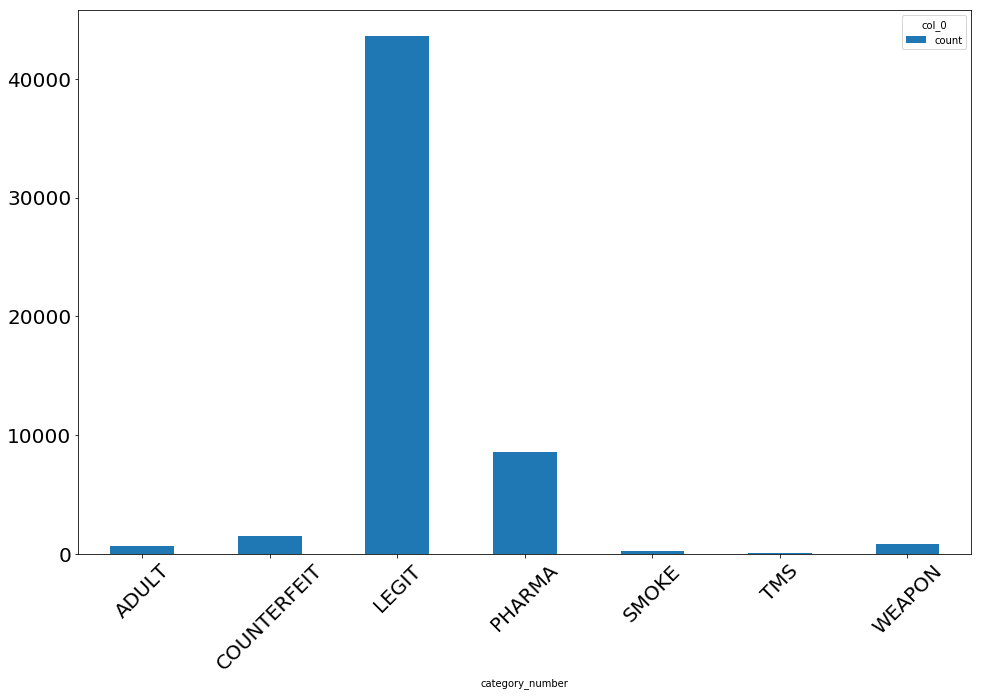

In [44]:
my_tab = pd.crosstab(index = df['category_number'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab.plot.bar(figsize = (16, 10), fontsize = 20, rot = 45)


In [45]:
(my_tab/my_tab.sum()) * 100

col_0                count
category_number           
ADULT             1.137470
COUNTERFEIT       2.664311
LEGIT            78.575549
PHARMA           15.432455
SMOKE             0.421819
TMS               0.205502
WEAPON            1.562894

In [46]:
df.head()

name category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...           LEGIT
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...           LEGIT
2     Vitamins Biotics Research - Detoxification 4oz           LEGIT
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...           LEGIT
4  Herbal Supplements Natural Natural Blood Press...           LEGIT

In [47]:
cat_dict_reverse = {'ADULT':0, 'COUNTERFEIT':1, 'LEGIT':2, 'PHARMA':3, 'SMOKE':4,'TMS':5, 'WEAPON':6}
df['category_number'] = df['category_number'].map(cat_dict_reverse)
df.head()


/home/karkin.mun/environments/ml_dir/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


name  category_number
0  Fat Burners & Thermogenics BLOODSHR3D (WAR EDI...                2
1  Vitamins Hylands Cell Salts #12 Silicea 30X Ta...                2
2     Vitamins Biotics Research - Detoxification 4oz                2
3  HEWLETT-PACKARD C3903A Toner 4000 Page-Yield B...                2
4  Herbal Supplements Natural Natural Blood Press...                2

In [48]:
docs = df['name'].values
labels = df['category_number'].values


In [49]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [50]:
d = {} 

for val in docs:
    if str(len(val)) not in d:
        d[str(len(val))] = 0 
    
    d[str(len(val))] += 1     
    
    
# key = number of words in the sentence 
# value = number of occurences which has that number of words in the sentence 

sorted(d.items(), key = lambda x: int(x[0]))

[('1', 1),
 ('2', 1),
 ('3', 1),
 ('4', 3),
 ('5', 3),
 ('6', 4),
 ('7', 2),
 ('8', 6),
 ('9', 9),
 ('10', 16),
 ('11', 18),
 ('12', 18),
 ('13', 17),
 ('14', 22),
 ('15', 31),
 ('16', 42),
 ('17', 30),
 ('18', 45),
 ('19', 65),
 ('20', 69),
 ('21', 72),
 ('22', 93),
 ('23', 114),
 ('24', 128),
 ('25', 117),
 ('26', 153),
 ('27', 185),
 ('28', 222),
 ('29', 249),
 ('30', 260),
 ('31', 248),
 ('32', 287),
 ('33', 312),
 ('34', 336),
 ('35', 351),
 ('36', 386),
 ('37', 425),
 ('38', 433),
 ('39', 469),
 ('40', 526),
 ('41', 588),
 ('42', 594),
 ('43', 673),
 ('44', 687),
 ('45', 749),
 ('46', 809),
 ('47', 784),
 ('48', 793),
 ('49', 855),
 ('50', 870),
 ('51', 886),
 ('52', 879),
 ('53', 846),
 ('54', 863),
 ('55', 870),
 ('56', 931),
 ('57', 880),
 ('58', 862),
 ('59', 807),
 ('60', 860),
 ('61', 805),
 ('62', 827),
 ('63', 784),
 ('64', 759),
 ('65', 725),
 ('66', 691),
 ('67', 678),
 ('68', 705),
 ('69', 626),
 ('70', 651),
 ('71', 583),
 ('72', 607),
 ('73', 529),
 ('74', 572),
 ('7

In [51]:
# max(d.items(), key = lambda x: int(x[0]))

# ('250', 29) seems like the good number to truncate 
# the sentence since beyond that, there's only a few sentence that has a length of over 250 

 The first step is to define the examples, encode them as integers, then pad the sequences to be the same length.
 
 In this case, we need to be able to map words to integers as well as integers to words.

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

In [52]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
# pad documents to a max length of 250 words 
max_length = 250
# using Keras's built in pad_sequences 
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')


In [53]:
len(encoded_docs)

55474

In [54]:
padded_docs, padded_docs.shape

(array([[   49,  1280,  1994, ...,     0,     0,     0],
        [   98,  1480,  1022, ...,     0,     0,     0],
        [   98,  1361,   350, ...,     0,     0,     0],
        ...,
        [ 2964, 12991,   984, ...,     0,     0,     0],
        [ 6474,   243,  5228, ...,     0,     0,     0],
        [ 5084,  1577,    48, ...,     0,     0,     0]], dtype=int32),
 (55474, 250))

Next, we need to load the entire GloVe word embedding file into memory as a dictionary of word to embedding array.

In [55]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [56]:
embeddings_index

{'giulietta': array([ 0.69684 , -0.31889 , -0.11014 ,  0.48142 , -0.29826 ,  0.24861 ,
         0.52302 ,  0.1252  ,  0.17223 ,  0.8628  ,  0.54675 ,  0.21369 ,
        -0.58    , -0.10994 , -0.50619 ,  0.11741 , -0.25187 ,  0.66298 ,
         0.60586 ,  0.4335  ,  0.43867 , -0.52113 ,  0.46897 ,  0.44874 ,
        -0.37288 ,  0.095796, -0.31067 ,  0.69091 ,  0.10407 , -0.37789 ,
        -0.3347  ,  0.70169 ,  0.087988, -0.55768 ,  0.38852 ,  0.12679 ,
         0.48782 , -0.10303 ,  1.012   ,  0.44842 ,  0.37862 ,  0.62658 ,
        -0.27298 , -0.25918 , -0.11977 ,  0.8365  , -0.64475 , -0.10068 ,
        -0.015789,  0.72741 , -0.2188  ,  1.2016  ,  0.5896  ,  0.003892,
        -0.93186 ,  0.42263 , -0.60048 ,  0.48879 , -1.1266  , -0.80942 ,
        -0.75976 , -0.052492,  0.33788 , -0.15544 ,  0.050203, -0.12731 ,
         0.29892 , -0.068534,  0.62454 ,  0.074221,  0.57055 , -0.1981  ,
        -0.26315 , -0.1776  ,  0.36489 ,  0.75489 ,  0.14436 , -0.17825 ,
         0.39146 , -0.590

In [57]:
len(embeddings_index), len(embeddings_index['howgill'])

(400000, 100)

Next, we need to create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

The result is a matrix of weights only for words we will see during training.

In [58]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [59]:
embedding_matrix.shape

(35295, 100)

## Embedding Layer -> MLP 

In [60]:
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=250, trainable=False)

In [61]:
len(y[0])

7

In [62]:
model = Sequential()
model.add(e)
model.add(Flatten())

model.add(Dense(5000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          3529500   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              125005000 
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_3 (Dense)              (None, 200)               200200    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 357       
Total para

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44379, 250), (11095, 250), (44379, 7), (11095, 7))

In [64]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience = 5, verbose=1)

In [65]:
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, callbacks = [es])


Train on 44379 samples, validate on 11095 samples
Epoch 1/50
44379/44379 [==============================] - 92s 2ms/step - loss: 0.2846 - acc: 0.9004 - val_loss: 0.2041 - val_acc: 0.9292
Epoch 2/50
44379/44379 [==============================] - 90s 2ms/step - loss: 0.1525 - acc: 0.9475 - val_loss: 0.2125 - val_acc: 0.9315
Epoch 3/50
44379/44379 [==============================] - 89s 2ms/step - loss: 0.0842 - acc: 0.9715 - val_loss: 0.2159 - val_acc: 0.9354
Epoch 4/50
44379/44379 [==============================] - 89s 2ms/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.2924 - val_acc: 0.9339
Epoch 5/50
44379/44379 [==============================] - 89s 2ms/step - loss: 0.0410 - acc: 0.9880 - val_loss: 0.3882 - val_acc: 0.9340
Epoch 6/50
44379/44379 [==============================] - 90s 2ms/step - loss: 0.0332 - acc: 0.9907 - val_loss: 0.2723 - val_acc: 0.9335
Epoch 00006: early stopping


In [66]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
loss, accuracy

(0.024850435160978103, 0.9933301786881182)

In [67]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.27233292620566957, 0.933483551192144)

In [68]:
reverse_word_map = dict(map(reversed, t.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices, is_list = False ):
    # Looking up words in dictionary
    if is_list:
        words = [reverse_word_map.get(letter) for letter in list_of_indices]
    else:
        words = reverse_word_map.get(list_of_indices)
    return(words)

In [69]:
my_texts = list(map(sequence_to_text, X_test[9]))
my_texts

['advil',
 '50',
 'count',
 'pain',
 'reliever',
 'fever',
 'reducer',
 'coated',
 'tablet',
 '200mg',
 'ibuprofen',
 'temporary',
 'pain',
 'relief',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 N

In [70]:
y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)

In [71]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_test_int =np.argmax(y_test, axis=1)

y_test_int

array([2, 2, 2, ..., 2, 2, 3])

In [73]:
len(np.where(y_pred != y_test_int)[0])

738

In [74]:
len(df[df['category_number'] != 2])

11885

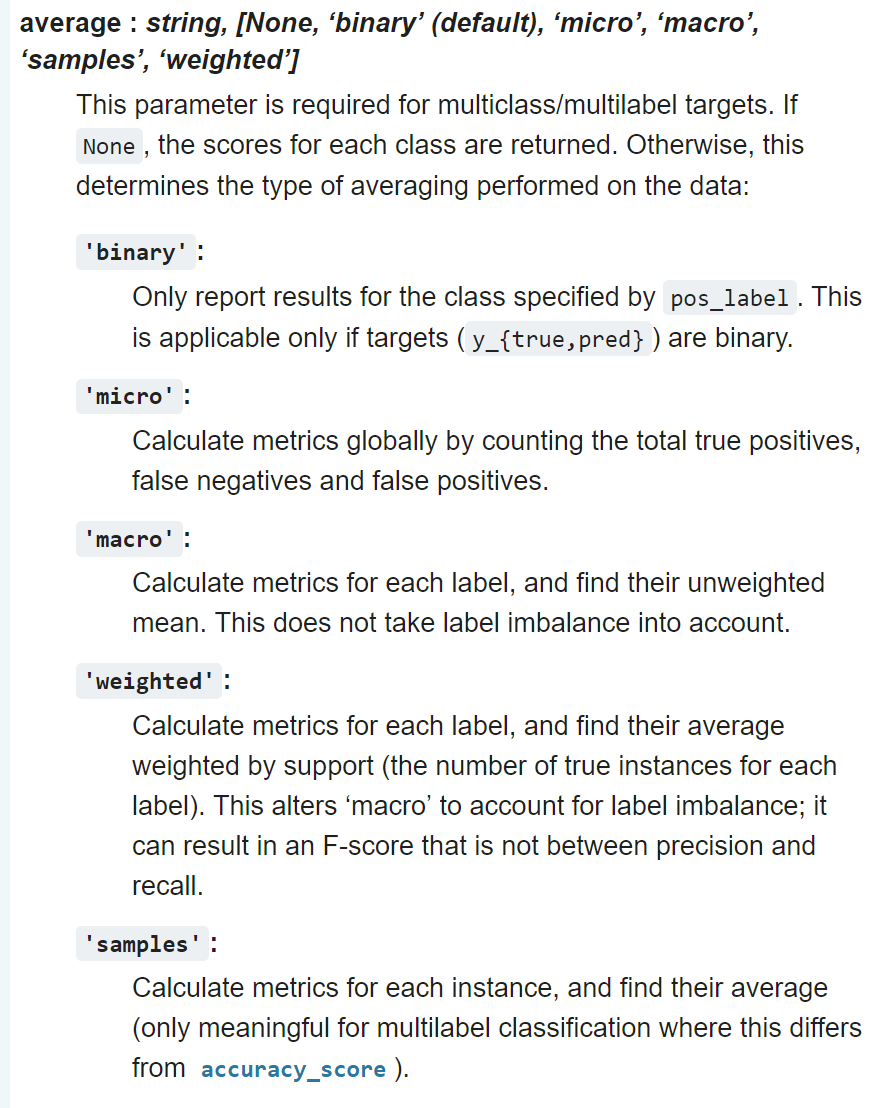

In [75]:
from sklearn.metrics import f1_score, classification_report

In [76]:
f1_score(y_test_int, y_pred, average = 'micro')

0.9334835511491663

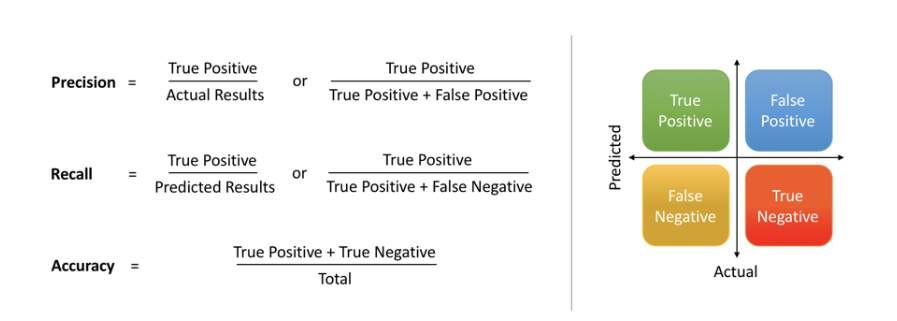

In [77]:
target_name = ['ADULT', 'COUNTERFEIT', 'LEGIT', 'PHARMA', 'SMOKE', 'TMS', 'WEAPON']
print(classification_report(y_test_int, y_pred, target_names=target_name))

              precision    recall  f1-score   support

       ADULT       0.78      0.68      0.73       126
 COUNTERFEIT       0.74      0.88      0.80       307
       LEGIT       0.96      0.96      0.96      8741
      PHARMA       0.85      0.82      0.84      1673
       SMOKE       1.00      0.85      0.92        48
         TMS       1.00      0.84      0.91        31
      WEAPON       0.94      0.96      0.95       169

    accuracy                           0.93     11095
   macro avg       0.90      0.86      0.87     11095
weighted avg       0.93      0.93      0.93     11095



### Embedding -> LSTM -> MLP 

In [78]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input

model = Sequential()
word_dim = 100 
e = Embedding(vocab_size, word_dim, weights=[embedding_matrix], input_length=250, trainable=False)
model.add(e)
model.add(LSTM(764, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(764, return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          3529500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 764)          2643440   
_________________________________________________________________
dropout_1 (Dropout)          (None, 250, 764)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 764)               4672624   
_________________________________________________________________
dropout_2 (Dropout)          (None, 764)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 5355      
Total params: 10,850,919
Trainable params: 7,321,419
Non-trainable params: 3,529,500
_________________________________________________________

In [79]:
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, callbacks = [es])


Train on 44379 samples, validate on 11095 samples
Epoch 1/50
44379/44379 [==============================] - 761s 17ms/step - loss: 0.7839 - acc: 0.7785 - val_loss: 0.6560 - val_acc: 0.7953
Epoch 2/50
44379/44379 [==============================] - 761s 17ms/step - loss: 0.6313 - acc: 0.8080 - val_loss: 0.5670 - val_acc: 0.8406
Epoch 3/50
44379/44379 [==============================] - 759s 17ms/step - loss: 0.5474 - acc: 0.8443 - val_loss: 0.3915 - val_acc: 0.8779
Epoch 4/50
44379/44379 [==============================] - 753s 17ms/step - loss: 0.3626 - acc: 0.8876 - val_loss: 0.2519 - val_acc: 0.9216
Epoch 5/50
44379/44379 [==============================] - 753s 17ms/step - loss: 0.2263 - acc: 0.9278 - val_loss: 0.1963 - val_acc: 0.9309
Epoch 6/50
44379/44379 [==============================] - 751s 17ms/step - loss: 0.1697 - acc: 0.9454 - val_loss: 0.1533 - val_acc: 0.9498
Epoch 7/50
44379/44379 [==============================] - 753s 17ms/step - loss: 0.1335 - acc: 0.9562 - val_loss: 0.

In [80]:
y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)
f1_score(y_test_int, y_pred, average = 'micro')

0.9588102748986029

In [81]:
target_name = ['ADULT', 'COUNTERFEIT', 'LEGIT', 'PHARMA', 'SMOKE', 'TMS', 'WEAPON']
print(classification_report(y_test_int, y_pred, target_names=target_name))

              precision    recall  f1-score   support

       ADULT       0.81      0.92      0.86       126
 COUNTERFEIT       0.83      0.97      0.90       307
       LEGIT       0.98      0.97      0.97      8741
      PHARMA       0.91      0.88      0.90      1673
       SMOKE       0.91      1.00      0.95        48
         TMS       1.00      0.94      0.97        31
      WEAPON       0.96      0.98      0.97       169

    accuracy                           0.96     11095
   macro avg       0.91      0.95      0.93     11095
weighted avg       0.96      0.96      0.96     11095



In [82]:
model.save('glove_50_LSTM_MLP.h5')

In [83]:
# Embeddings -> biLSTM -> MLP 

In [84]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Bidirectional

model = Sequential()
word_dim = 100 
e = Embedding(vocab_size, word_dim, weights=[embedding_matrix], input_length=250, trainable=False)
model.add(e)
model.add(Bidirectional(LSTM(764, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(764, return_sequences = False)))
model.add(Dropout(0.5))

model.add(Dense(len(y[0]), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          3529500   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 250, 1528)         5286880   
_________________________________________________________________
dropout_3 (Dropout)          (None, 250, 1528)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1528)              14014816  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1528)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 10703     
Total params: 22,841,899
Trainable params: 19,312,399
Non-trainable params: 3,529,500
________________________________________________________

In [ ]:
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, callbacks = [es])


Train on 44379 samples, validate on 11095 samples
Epoch 1/50
44379/44379 [==============================] - 1560s 35ms/step - loss: 0.4913 - acc: 0.8391 - val_loss: 0.5435 - val_acc: 0.8284
Epoch 2/50
44379/44379 [==============================] - 1558s 35ms/step - loss: 0.4596 - acc: 0.8641 - val_loss: 0.2979 - val_acc: 0.9092
Epoch 3/50
44379/44379 [==============================] - 1558s 35ms/step - loss: 0.3014 - acc: 0.9079 - val_loss: 0.2356 - val_acc: 0.9305
Epoch 4/50
35968/44379 [=======================>......] - ETA: 4:35 - loss: 0.2403 - acc: 0.9255

In [ ]:
y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)
f1_score(y_test_int, y_pred, average = 'micro')

In [ ]:
target_name = ['ADULT', 'COUNTERFEIT', 'LEGIT', 'PHARMA', 'SMOKE', 'TMS', 'WEAPON']
print(classification_report(y_test_int, y_pred, target_names=target_name))

In [ ]:
model.save('glove_50_biLSTM_MLP.h5')

In [ ]:
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed, Dropout
from keras import backend as K
from keras import optimizers
from keras.models import Model

embedding_layer = Embedding(len(word_index) + 1,embed_size,weights=[embedding_matrix], input_length=max_senten_len, trainable=False)
# Words level attention model
word_input = Input(shape=(max_senten_len,), dtype='float32')
word_sequences = embedding_layer(word_input)
word_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
word_att = AttentionWithContext()(word_dense)
wordEncoder = Model(word_input, word_att)
# Sentence level attention model
sent_input = Input(shape=(max_senten_num, max_senten_len), dtype='float32')
sent_encoder = TimeDistributed(wordEncoder)(sent_input)
sent_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
sent_att = Dropout(0.5)(AttentionWithContext()(sent_dense))
preds = Dense(30, activation='softmax')(sent_att)
model = Model(sent_input, preds)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=50, verbose=1, callbacks = [es])


In [ ]:
y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)
f1_score(y_test_int, y_pred, average = 'micro')

In [ ]:
target_name = ['ADULT', 'COUNTERFEIT', 'LEGIT', 'PHARMA', 'SMOKE', 'TMS', 'WEAPON']
print(classification_report(y_test_int, y_pred, target_names=target_name))

In [ ]:
model.save('glove_50_HAN.h5')